In [1]:
# customer segmentation using k means clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
x= df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
#model training
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

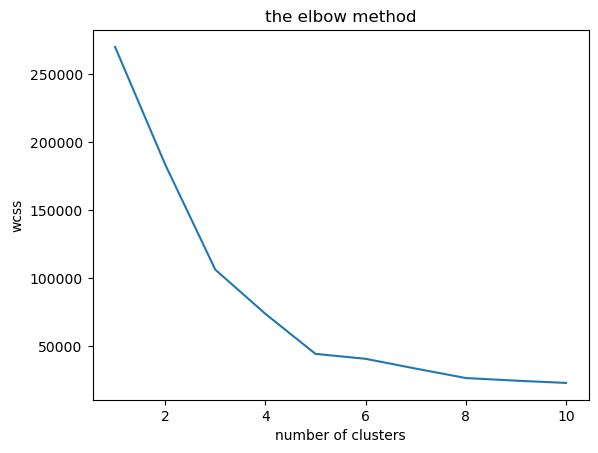

In [11]:
#creating the plot
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


In [15]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

# Preparing the model
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
k_mean = KMeans(n_clusters=5, random_state=42)
y_mean = k_mean.fit_predict(x)

# Function to show the entry fields and predict the cluster
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    result = k_mean.predict([[p1, p2]])
    print("This customer belongs to cluster no:", result[0])
    
    cluster_info = {
        0: "Customer with medium annual income & medium spending score",
        1: "Customer with high annual income & low spending score",
        2: "Customer with low annual income & low spending score",
        3: "Customer with low annual income & high spending score",
        4: "Customer with high annual income & high spending score"
    }
    
    # Clear previous result labels if any
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) >= 4:  # Assuming info labels start from row 4
            widget.destroy()
    
    Label(master, text=cluster_info[result[0]]).grid(row=4)

# Create the main application window
master = Tk()
master.title("Customer Segmentation using Machine Learning by Didar Abbas-211P036")
Label(master, text="Didar's code for Customer Segmentation using Machine Learning", bg="Yellow", fg="black").grid(row=0, columnspan=2)

# Input labels and entries
Label(master, text="Annual Income (k$)").grid(row=1)
Label(master, text="Spending Score (1-100)").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plotting the clusters
figure = plt.Figure(figsize=(5, 4), dpi=100)
ax = figure.add_subplot(111)
for i in range(5):  # Since n_clusters=5
    ax.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('Annual Income vs Spending Score')
ax.legend()

# Adding the plot to the Tkinter window
scatter = FigureCanvasTkAgg(figure, master)
scatter.get_tk_widget().grid(row=5, columnspan=2)

# Start the Tkinter main loop
master.mainloop()


This customer belongs to cluster no: 3


In [ ]:
import pandas as pd
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

# Load and prepare the data for clustering
df = pd.read_csv("placement.csv")
x = df[['cgpa', 'package']]

# Initialize KMeans with the desired number of clusters
k_mean = KMeans(n_clusters=5, random_state=42)
y_mean = k_mean.fit_predict(x)

# Function to show the entry fields and predict the cluster
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    result = k_mean.predict([[p1, p2]])
    print("This student belongs to cluster no:", result[0])
    
    cluster_info = {
        0: "Students with medium CGPA and medium package",
        1: "Students with high CGPA and low package",
        2: "Students with low CGPA and low package",
        3: "Students with low CGPA and high package",
        4: "Students with high CGPA and high package"
    }
    
    # Clear previous labels if any
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) >= 4:  # Assuming info labels start from row 4
            widget.destroy()
    
    Label(master, text=cluster_info[result[0]]).grid(row=4)

# Create the main application window
master = Tk()
master.title("Student Placement Segmentation by Didar Abbas 211P036")

# Title label
Label(master, text="Student Placement Segmentation using Machine Learning", bg="Yellow", fg="black").grid(row=0, columnspan=2)

# Input labels and entries
Label(master, text="CGPA").grid(row=1)
Label(master, text="Package").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plotting
figure = plt.Figure(figsize=(5, 4), dpi=100)
ax = figure.add_subplot(111)

# Sample scatter plot for clusters
for i in range(5):  # Since n_clusters=5
    ax.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')

# Set labels and title
ax.set_xlabel('CGPA')
ax.set_ylabel('Package')
ax.set_title('CGPA vs Package')
ax.legend()

# Displaying figure in Tkinter
scatter = FigureCanvasTkAgg(figure, master)
scatter.get_tk_widget().grid(row=5, columnspan=2)

# Run the application
master.mainloop()


This student belongs to cluster no: 4
This student belongs to cluster no: 4
This student belongs to cluster no: 4
This student belongs to cluster no: 1
